# Тема “Обучение без учителя”
## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InLineBackend.figure_format = 'svg'

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

In [62]:
from sklearn.datasets import load_boston

X, y = load_boston()['data'], load_boston()['target']

X = pd.DataFrame(X, columns=load_boston()['feature_names'])
y = pd.DataFrame(y, columns=['target'])

X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)

с помощью функции train_test_split так, чтобы размер тестовой выборки

составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

X_test_scale

array([[-0.39680933, -0.50032012, -1.00711147, ..., -0.77195078,
         0.42887165, -0.48121032],
       [-0.40079621,  1.2294987 , -0.66439105, ..., -0.32270256,
         0.44418004, -1.25709448],
       [-0.39523443, -0.50032012,  2.43316256, ...,  0.80041799,
         0.36993437,  0.79033849],
       ...,
       [ 1.1779666 , -0.50032012,  1.03323679, ...,  0.84534281,
        -3.5124912 ,  1.23390203],
       [-0.40131065, -0.50032012, -0.94321444, ...,  0.08162084,
         0.43422959,  0.05669848],
       [-0.39643252, -0.50032012,  0.26792466, ...,  0.17147048,
         0.29470458, -0.49529171]])

Постройте модель TSNE на тренировочный данных с параметрами:

n_components=2, learning_rate=250, random_state=42.

In [80]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scale)

/home/george/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


Постройте диаграмму рассеяния на этих данных.

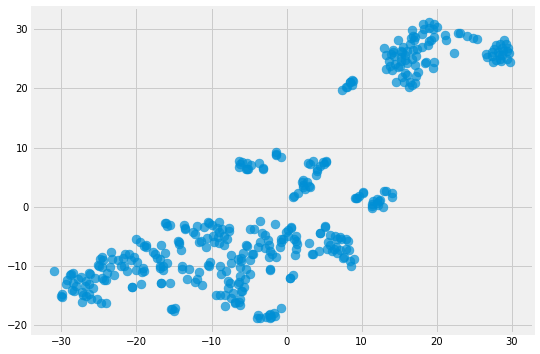

In [66]:
plt.figure(figsize=(8, 6))
plt.grid(True)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], s=80, alpha=0.7)

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

In [95]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)
train_labels = model.fit_predict(X_train_scale)

train_labels[:10]

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1], dtype=int32)

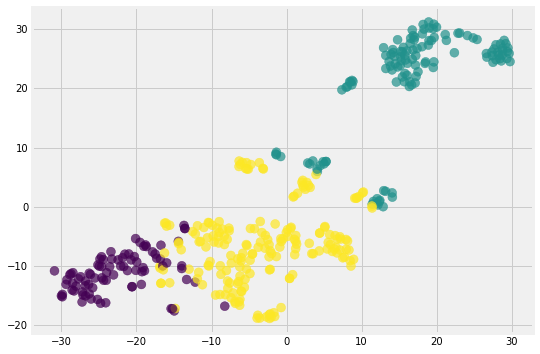

In [96]:
plt.figure(figsize=(8, 6))
plt.grid(True)

plt.scatter(X_train_tsne[:, 0], 
            X_train_tsne[:, 1],
            c=train_labels,
            s=80, 
            alpha=0.7)

Вычислите средние значения price и CRIM в разных кластерах.

In [105]:
X_train['clusters'] = train_labels
X_train['price'] = y_train
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,clusters,price
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,1,12.0
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,2,19.9
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,0,19.4
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,1,13.4
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,2,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66,2,19.5
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00,2,21.1
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,0,24.5
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27,1,13.4


In [110]:
price_crim_mean = X_train.groupby('clusters').agg({'price': 'mean', 'CRIM': 'mean'}) \
                                             .rename(columns={'price': 'mean_price',
                                                              'CRIM': 'mean_CRIM'})

price_crim_mean

,mean_price,mean_CRIM
clusters,,
0,27.788372,0.073566
1,16.165354,10.797028
2,24.958115,0.421660


## *Задание 3
Примените модель KMeans, построенную в предыдущем задании,

к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [124]:
X_test_scale = scaler.transform(X_test)

clusters = model.predict(X_test_scale)

X_test['clusters'] = clusters
X_test['price'] = y_test

clusters

array([2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       1, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2], dtype=int32)

In [128]:
price_crim_mean = X_test.groupby(['clusters']).agg({'price': 'mean', 'CRIM': 'mean'}) \
                                              .rename(columns={'price': 'mean_price',
                                                               'CRIM': 'mean_CRIM'})

price_crim_mean

,mean_price,mean_CRIM
clusters,,
0,31.350000,0.062060
1,16.437143,10.165531
2,21.860784,0.266079
